<a href="https://colab.research.google.com/github/dazaca/ML_000_EXAMPLES/blob/main/KerasTF_installation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [4]:
install.packages("reticulate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Preparing the Data

The MNIST dataset is included with Keras and can be accessed using the dataset_mnist() function. Here we load the dataset then create variables for our test and training data:

In [6]:
library(reticulate)


In [8]:
library(keras)
mnist <- dataset_mnist()

Loaded Tensorflow version 2.7.0



In [9]:
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

The **x data** is a 3-d array (images,width,height) of grayscale values. To prepare the data for training we convert the 3-d arrays into matrices by reshaping width and height into a single dimension (28x28 images are flattened into length 784 vectors). Then, we convert the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1:

In [15]:
# reshape
dim(x_train) <- c(nrow(x_train), 784)
dim(x_test) <- c(nrow(x_test), 784)
# rescale
x_train <- x_train / 255
x_test <- x_test / 255


The **y data** is an integer vector with values ranging from 0 to 9. To prepare this data for training we one-hot encode the vectors into binary class matrices using the Keras to_categorical() function:

In [16]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

## Defining the model

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the sequential model, a linear stack of layers.

We begin by creating a sequential model and then adding layers using the pipe (%>%) operator:

In [17]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = "relu", input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = "relu") %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = "softmax")

The input_shape argument to the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). The final layer outputs a length 10 numeric vector (probabilities for each digit) using a softmax activation function.

Use the summary() function to print the details of the model:

In [18]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2 (Dense)                    (None, 256)                     200960      
                                                                                
 dropout_1 (Dropout)                (None, 256)                     0           
                                                                                
 dense_1 (Dense)                    (None, 128)                     32896       
                                                                                
 dropout (Dropout)                  (None, 128)                     0           
                                                                                
 dense (Dense)                      (None, 10)                      1290        
                                                                                
Total pa

Next, compile the model with appropriate loss function, optimizer, and metrics:

In [19]:
model %>% compile(
  loss = "categorical_crossentropy",
  optimizer = optimizer_rmsprop(),
  metrics = c("accuracy")
)

## Training and Evaluation

Use the fit() function to train the model for 30 epochs using batches of 128 images:

In [20]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)

The history object returned by fit() includes loss and accuracy metrics which we can plot:

`geom_smooth()` using formula 'y ~ x'



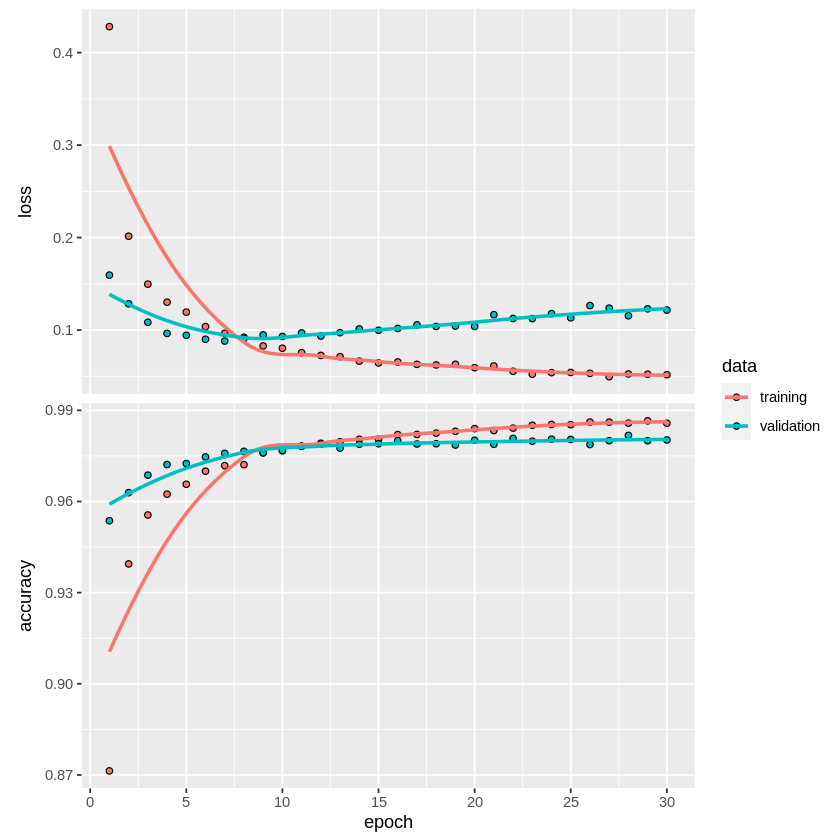

In [21]:
plot(history)

Evaluate the model’s performance on the test data:

In [22]:
model %>% evaluate(x_test, y_test,verbose = 0)

loss  accuracy 
0.1150604 0.9796000

Generate predictions on new data and show 20 values ...

In [23]:
# model %>% predict_classes(x_test) tensorflow 2.5 o minor
y_pred <- model %>% predict(x_test) %>% k_argmax() %>% as.integer()
y_pred[1:20]

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4

Confusion Matrix:

In [25]:
y_pred.f<-as.factor(y_pred)
y_test.f<-as.factor(mnist$test$y)

install.packages("caret")
library(caret)
confusionMatrix(y_pred.f,y_test.f)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  970    0    3    2    1    2    4    1    4    1
         1    1 1126    2    0    0    0    3    4    0    3
         2    1    2 1008    3    2    0    0   12    4    0
         3    0    0    5  988    0    3    1    3    5    9
         4    0    0    2    0  969    1    4    0    5   13
         5    1    1    0    6    0  875    4    0    5    1
         6    4    2    2    0    3    4  941    0    2    0
         7    1    1    6    7    1    2    0 1004    4    5
         8    1    3    4    1    0    2    1    0  939    1
         9    1    0    0    3    6    3    0    4    6  976

Overall Statistics
                                          
               Accuracy : 0.9796          
                 95% CI : (0.9766, 0.9823)
    No Information Rate : 0.1135          
    P-Value [Acc > NIR] : < 2.2e-16       
                                         